# Problem Statement: Classify whether news is reliable or not.

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [2]:
#read data from file
def load_data(filename):
    if(filename.endswith('csv')):
        data = pd.read_csv(filename)
    if(filename.endswith('xls') or filename.endswith('xlsx')):
        data = pd.read_excel(filename)
    return data
data= load_data('/Users/sonamramchand/Desktop/dspd project/fakenewsdata.csv')

/Users/sonamramchand/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Get eagle's view on the data

In [3]:
#Get Familiar with the data
def understandData(data):
    print(data.head()
understandData(data)    

   Unnamed: 0  id                 domain        type  \
0           0  21   bipartisanreport.com   clickbait   
1           1  22       theshovel.com.au      satire   
2           2  54  blackagendareport.com  unreliable   
3           3  61     barenakedislam.com        hate   
4           4  64  blackagendareport.com  unreliable   

                                                 url  \
0  http://bipartisanreport.com/cdn-cgi/l/email-pr...   
1  http://www.theshovel.com.au/tag/malcolm-turnbu...   
2  https://blackagendareport.com/what-western-imp...   
3  http://barenakedislam.com/2018/01/08/wow-irani...   
4  https://blackagendareport.com/articlelist/afri...   

                                             content  \
0  The website from which you got to this page is...   
1  For as long as he can remember, Malcolm Turnbu...   
2  What Western Imperialism Is Up to Now in Zimba...   
3  We appreciate your help! Click here to donate\...   
4  “The massacre of the mine workers in August

In [4]:
#Get numerical understanding to data
def describeData(data):
    print(data.describe())
describeData(data)    

          Unnamed: 0  keywords  summary
count  426550.000000       0.0      0.0
mean   213274.500000       NaN      NaN
std    123134.522998       NaN      NaN
min         0.000000       NaN      NaN
25%    106637.250000       NaN      NaN
50%    213274.500000       NaN      NaN
75%    319911.750000       NaN      NaN
max    426549.000000       NaN      NaN


In [5]:
#Get Insights of data
def basicAnalysis(data):
    print("Number of Rows and Columns:\n", data.shape , "\n")
    print("Column Names are:\n", data.columns,"\n" )
    print("Types of columns are:\n", data.dtypes, "\n")
basicAnalysis(data)

Number of Rows and Columns:
 (426550, 17) 

Column Names are:
 Index(['Unnamed: 0', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
       'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
       'meta_keywords', 'meta_description', 'tags', 'summary', 'source'],
      dtype='object') 

Types of columns are:
 Unnamed: 0            int64
id                   object
domain               object
type                 object
url                  object
content              object
scraped_at           object
inserted_at          object
updated_at           object
title                object
authors              object
keywords            float64
meta_keywords        object
meta_description     object
tags                 object
summary             float64
source               object
dtype: object 



In [6]:
#Data Cleaning- Count Missing Values
def countMissingValues(data):
    #we remove missings first. Let's see how many missings we have
    print(data.isnull().sum())
countMissingValues(data) 

Unnamed: 0               0
id                       1
domain                   5
type                 20150
url                      5
content                  5
scraped_at               6
inserted_at              6
updated_at               6
title                 3642
authors             189468
keywords            426550
meta_keywords        17137
meta_description    224209
tags                328314
summary             426550
source              332180
dtype: int64


We can not use keywords, summary, source,tags, meta_description, meta_keywords, authors attributes as there are many missing values out of 426550 instances. 

Data Pre-Processing

In [7]:
data['summary'] = data['summary'].astype('str') 
data['keywords'] = data['keywords'].astype('str') 
data['id'] = pd.to_numeric(data['id'], errors="coerce")
#have to deal with missing values firstly
#data['id'] = data['id'].astype('int')
#check data type after type conversion
data.dtypes

Unnamed: 0            int64
id                  float64
domain               object
type                 object
url                  object
content              object
scraped_at           object
inserted_at          object
updated_at           object
title                object
authors              object
keywords             object
meta_keywords        object
meta_description     object
tags                 object
summary              object
source               object
dtype: object

In [8]:
#Data Cleaning- Remove missing values by mode
def removeMissingValuesByMode(data, cols):
    modeval=data[cols].mode()[0]
    #print(modeval.dtype)
    data[cols].fillna(modeval,inplace=True)
    return data

In [9]:
removeMissingValuesByMode(data,'domain')
removeMissingValuesByMode(data,'type')
removeMissingValuesByMode(data,'title')
removeMissingValuesByMode(data,'content')
removeMissingValuesByMode(data,'url')
countMissingValues(data) 

Unnamed: 0               0
id                       6
domain                   0
type                     0
url                      0
content                  0
scraped_at               6
inserted_at              6
updated_at               6
title                    0
authors             189468
keywords                 0
meta_keywords        17137
meta_description    224209
tags                328314
summary                  0
source              332180
dtype: int64


Data columns to be dropped are yet to be decided in team. 
I think we should remove Unnamed, id, [scraped_at,inserted_at,updated_at(these may be not)], authors,meta_keywords,meta_description, tags, summary,source.

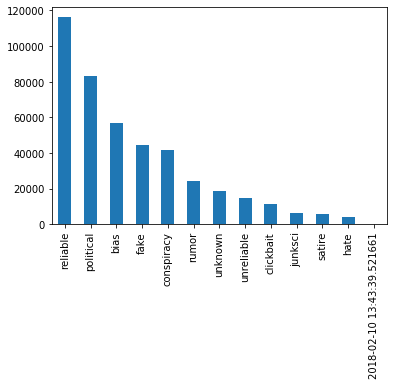

In [10]:
data['type'].value_counts().plot(kind='bar')

Ooops! we have invalid value in the type column, so we need to remove it.

In [16]:
#replace invalid values by mode
data['type'] = data['type'].replace(['2018-02-10 13:43:39.521661'],'reliable')

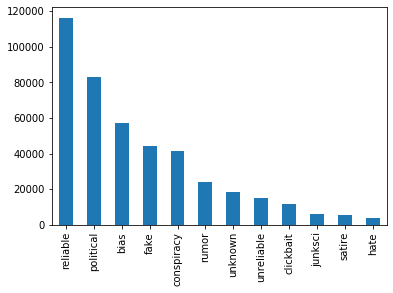

In [17]:
data['type'].value_counts().plot(kind='bar')